# Superstore Analytics

In [1]:
%pip install pandas
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


## Load Data

In [2]:
import pandas as pd

# Observe Data

In [3]:
df = pd.read_csv("Superstore.csv")

In [4]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21/01/2014,23/01/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26/02/2017,3/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26/02/2017,3/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26/02/2017,3/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [6]:
df.size

209874

In [7]:
df[['Sales', 'Profit']].describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


In [8]:
df.shape

(9994, 21)

# Aggregate Data

In [9]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [11]:
df.groupby('Category').Sales.agg('sum')

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [12]:
df.groupby('Category').agg('sum')['Sales']

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

<Axes: ylabel='Sub-Category'>

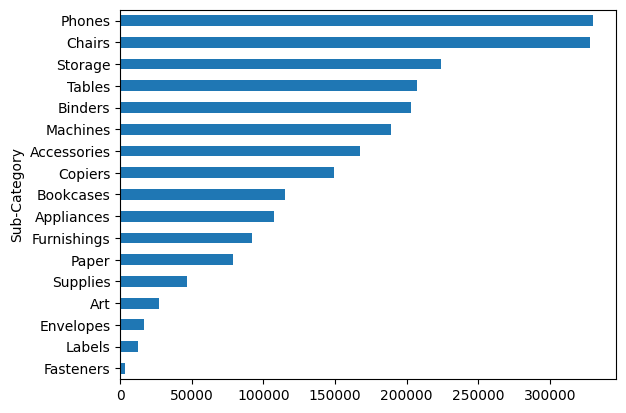

In [13]:
df.groupby('Sub-Category').agg('sum')['Sales'].sort_values().plot(kind='barh')

# Monthly Sales

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

df['Order Date']

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

<Axes: xlabel='Order Date'>

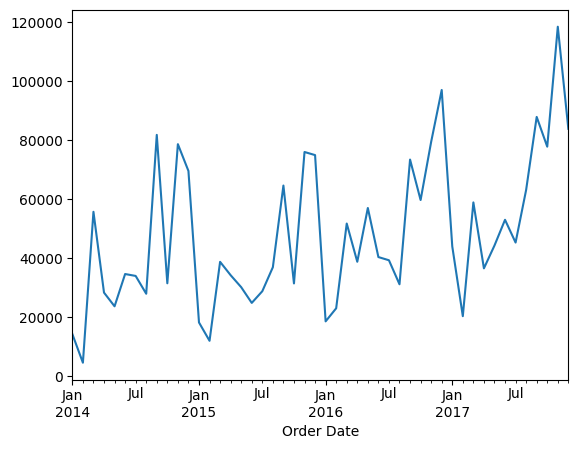

In [15]:
df.groupby(pd.Grouper(key='Order Date',freq='M')).Sales.agg('sum').plot()

# How many sub-categories in each category?

In [16]:
df.groupby('Category')['Sub-Category'].nunique()



Category
Furniture          4
Office Supplies    9
Technology         4
Name: Sub-Category, dtype: int64

# Who is the best customer from sales?

In [17]:
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

Customer Name
Sean Miller        25043.050
Tamara Chand       19052.218
Raymond Buch       15117.339
Tom Ashbrook       14595.620
Adrian Barton      14473.571
                     ...    
Roy Skaria            22.328
Mitch Gastineau       16.739
Carl Jackson          16.520
Lela Donovan           5.304
Thais Sissman          4.833
Name: Sales, Length: 793, dtype: float64

# Which sub-categories makes the most profit?

In [18]:
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64

# Which month has the most orders?

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Month'] = df['Order Date'].dt.month

df['Order Month'].value_counts()

Order Month
11    1471
12    1408
9     1383
10     819
5      735
6      717
7      710
8      706
3      696
4      668
1      381
2      300
Name: count, dtype: int64

# Which product has the highest price per unit?

In [20]:
df['Price Per Unit'] = df['Sales'] / df['Quantity']
df.groupby('Product Name')['Price Per Unit'].max().sort_values(ascending=False)


Product Name
Cisco TelePresence System EX90 Videoconferencing Unit                    3773.080
Canon imageCLASS 2200 Advanced Copier                                    3499.990
Cubify CubeX 3D Printer Double Head Print                                2399.992
Cubify CubeX 3D Printer Triple Head Print                                1999.995
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier    1995.990
                                                                           ...   
OIC Binder Clips, Mini, 1/4" Capacity, Black                                1.240
OIC Thumb-Tacks                                                             1.140
Maxell 4.7GB DVD+R 5/Pack                                                   0.990
Maxell 4.7GB DVD-R 5/Pack                                                   0.990
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac            0.812
Name: Price Per Unit, Length: 1850, dtype: float64